# GloVe (Gensim)

For looking at word vectors, we'll use **Gensim**. **Gensim** isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.   We gonna use **GloVe** embeddings, downloaded at [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

In [1]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#you have to put this file in some python/gensim directory; just run it and it will inform where to put....
glove_file = datapath('glove.6B.100d.txt')
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [2]:
#return the vectors
model['coffee'].shape

(100,)

### Similarity

In [3]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851963639259338),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930821418762),
 ('kerry', 0.7472624182701111)]

In [4]:
model.most_similar('coke')

[('cola', 0.8380195498466492),
 ('pepsi', 0.7717815041542053),
 ('coca', 0.7455084323883057),
 ('beer', 0.6947750449180603),
 ('pepsico', 0.6941383481025696),
 ('bottling', 0.681828498840332),
 ('soda', 0.6482692360877991),
 ('drink', 0.6394657492637634),
 ('drinks', 0.6368611454963684),
 ('bottlers', 0.6348696351051331)]

In [5]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.705482542514801),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629635691642761),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [6]:
model.most_similar('language')

[('languages', 0.8260655403137207),
 ('word', 0.7464082837104797),
 ('spoken', 0.7381494045257568),
 ('arabic', 0.7318817377090454),
 ('english', 0.7214903235435486),
 ('dialect', 0.6912703514099121),
 ('vocabulary', 0.6908208727836609),
 ('text', 0.685594916343689),
 ('translation', 0.6810674071311951),
 ('words', 0.6715823411941528)]

In [7]:
#multiple meanings....
model.most_similar("plant")

[('plants', 0.8918154239654541),
 ('factory', 0.7068111896514893),
 ('farm', 0.6553632616996765),
 ('facility', 0.6538199782371521),
 ('production', 0.6336488127708435),
 ('produce', 0.6246358156204224),
 ('processing', 0.6155514121055603),
 ('fertilizer', 0.6091734170913696),
 ('waste', 0.6080261468887329),
 ('factories', 0.6015971302986145)]

In [8]:
model.most_similar(negative='banana')

[('shunichi', 0.49618101119995117),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845886707306),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947536945343)]

In [9]:
#woman + king - man
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [10]:
result = model.most_similar(positive=['italy', 'sushi'], negative=['japan'])
print("{}: {:.4f}".format(*result[0]))

tapas: 0.6232


### Cosine Similarity

We have talked about this in the last class.  Here we can conveniently use `distance` to find the cosine distance between two words. Note that distance = 1 - similarity.

In [11]:
w1 = "dog"
w2 = "cat"
w3 = "fruit"
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

#dog is much closer to cat then dog to fruit
w1_w2_dist, w1_w3_dist

(0.12019246816635132, 0.6231490671634674)

In [12]:
w1 = "happy" # synonym 1
w2 = "cheerful" # synonym 2
w3 = "sad" # antonym
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

#$w_1$="happy" is closer to $w_3$="sad" than to $w_2$="cheerful"!!
#those similarlity does not handle antonym....
w1_w2_dist, w1_w3_dist

(0.4540063142776489, 0.3198864459991455)

### Bias

You guys....one very important thing is that NLP models are biased.....very bad....

In [13]:
import pprint

pprint.pprint(model.most_similar(positive=['woman', 'worker'], negative=['man']))

[('nurse', 0.6614274978637695),
 ('employee', 0.6432636976242065),
 ('workers', 0.6231537461280823),
 ('migrant', 0.6021152138710022),
 ('immigrant', 0.5768847465515137),
 ('child', 0.5701467990875244),
 ('nurses', 0.5673794746398926),
 ('pregnant', 0.5660357475280762),
 ('nursing', 0.564837634563446),
 ('teacher', 0.5609063506126404)]


In [14]:
pprint.pprint(model.most_similar(positive=['man', 'worker'], negative=['woman']))

[('employee', 0.6741486191749573),
 ('workers', 0.6706238985061646),
 ('working', 0.6157787442207336),
 ('factory', 0.597054123878479),
 ('farmer', 0.5912192463874817),
 ('mechanic', 0.5748479962348938),
 ('laborer', 0.5643914937973022),
 ('job', 0.5637211799621582),
 ('strike', 0.5605738759040833),
 ('labor', 0.5600940585136414)]


In [15]:
pprint.pprint(model.most_similar(positive=["woman", "doctor"], negative=["man"]))

[('nurse', 0.7735227942466736),
 ('physician', 0.7189430594444275),
 ('doctors', 0.6824327707290649),
 ('patient', 0.6750682592391968),
 ('dentist', 0.6726033091545105),
 ('pregnant', 0.6642460823059082),
 ('medical', 0.6520450115203857),
 ('nursing', 0.645348072052002),
 ('mother', 0.6393327116966248),
 ('hospital', 0.6387495994567871)]


### Analogy

In [16]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [17]:
analogy('japan', 'japanese', 'australia')

'australian'

In [18]:
analogy('japan', 'sushi', 'italy')

'tapas'

In [19]:
analogy('australia', 'beer', 'france')

'champagne'

In [20]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [21]:
analogy('tall', 'tallest', 'long')

'longest'

In [22]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [23]:
analogy('bird', 'fly', 'human')

'bound'

In [24]:
#which word in the list does not belong
print(model.doesnt_match("coke pepsi sprite water".split()))

water


### Visualization

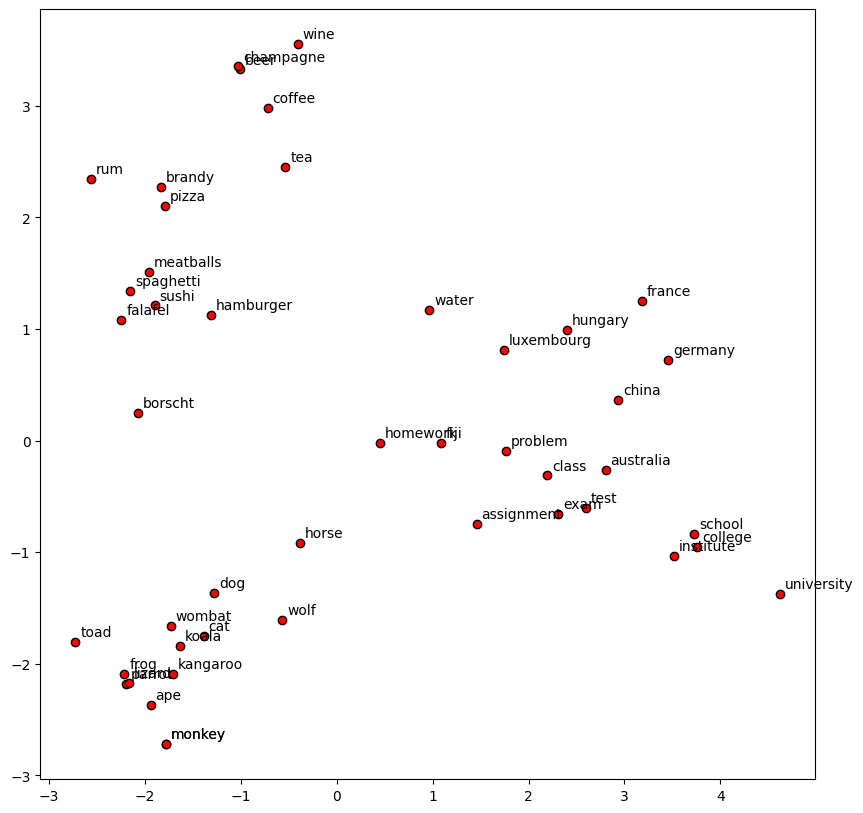

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
        'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
        'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
        'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'school', 'college', 'university', 'institute']

word_vectors = np.array([model[w] for w in words])

twodim = PCA().fit_transform(word_vectors)[:,:2]  #transform 100 to 2 dimensions

plt.figure(figsize=(10,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word)
plt.show()